<a href="https://colab.research.google.com/github/mohammadAliMkh/Pytorch/blob/main/MiniFoodVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from zipfile import ZipFile
import requests
import os
from pathlib import Path
import random

In [3]:
current_dir = Path.cwd()
folder_name = "MiniFoodVisioin"
full_dir = current_dir/folder_name

if Path.exists(full_dir):
  print("Folder Already Exists...")
else:
  Path.mkdir(full_dir)

In [4]:
file_name = Path.cwd()/"foodvision_mini.zip"

In [5]:
r = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

with open(file_name , "wb") as f:
  f.write(r.content)

In [6]:
 # loading the temp.zip and creating a zip object
with ZipFile(file_name, 'r') as extract:
  
    # Extracting all the members of the zip 
    # into a specific location.
    extract.extractall(
        path=full_dir)

In [7]:
# how my data folder look like?
print(f"number of files in root folder: {len(os.listdir(full_dir))}\n")

for folder in os.listdir(full_dir):
  print("--- " + folder + " ---")
  sub_folder = full_dir/folder
  for x in os.listdir(sub_folder):
    print("\t" + x + "\t" + f"number of files: {len(os.listdir(sub_folder/x))}")
  print("\n")

number of files in root folder: 2

--- test ---
	sushi	number of files: 31
	pizza	number of files: 25
	steak	number of files: 19


--- train ---
	sushi	number of files: 72
	pizza	number of files: 78
	steak	number of files: 75




In [8]:
# plot some random images in my folders
import matplotlib.pyplot as plt

def plot_images(root_path = full_dir, folder_name = "train" , number_of_rows = 3 , number_of_columns = 3):
  folder_list = os.listdir(full_dir/folder_name)
  plt.figure(figsize = (15 , 10))

  for i in range(number_of_rows * number_of_columns):
    random_folder = random.choice(folder_list)
    random_image = random.choice(os.listdir(root_path/folder_name/random_folder))
    image_path = root_path/folder_name/random_folder/random_image
    image = plt.imread(image_path)

    plt.subplot(number_of_rows , number_of_columns , i + 1)
    plt.imshow(image)
    plt.title(random_folder + " " + str(image.shape))
    plt.axis(False)

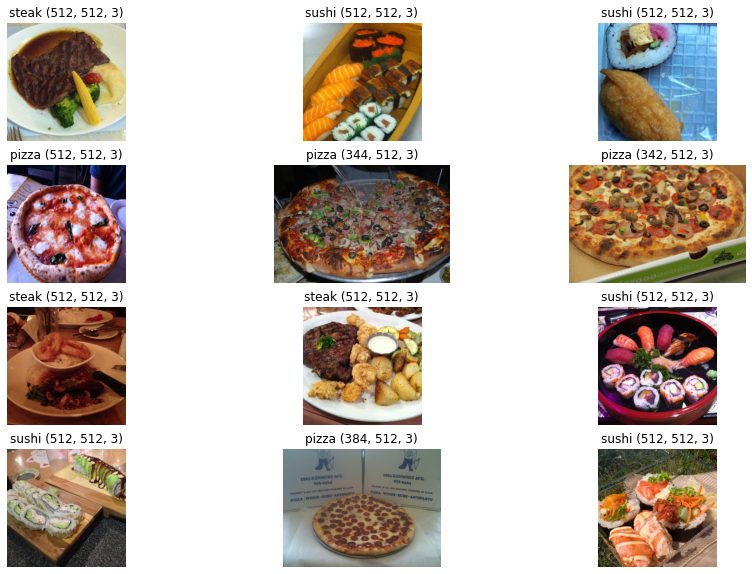

In [9]:
plot_images(folder_name = "test" , number_of_rows = 4 , number_of_columns = 3)

In [10]:
# find minimum size of images in all folders
from PIL import Image

hight_min = 512
width_min = 512
for folder in os.listdir(full_dir):
  for sub_folder in os.listdir(full_dir/folder):
    for image in os.listdir(full_dir/folder/sub_folder):
      
      h_min = Image.open(full_dir/folder/sub_folder/image).size[0]
      w_min = Image.open(full_dir/folder/sub_folder/image).size[1]

      if h_min < hight_min:
        hight_min = h_min
      if w_min < width_min:
        width_min = w_min

print(f"minimum width: {width_min}")
print(f"minimu hight: {hight_min}")
print(f"({width_min} , {hight_min})")     

minimum width: 262
minimu hight: 289
(262 , 289)


In [13]:
from torchvision import transforms
import torch

In [81]:
# we have build transformers in 2 different kinds, let's start with first of them
transformer1 = transforms.Compose([
    transforms.RandomHorizontalFlip(p = 1),
    #transforms.CenterCrop(size = (256  , 256)),
    transforms.Resize(size = (256 , 256)),
    transforms.ToTensor()
])

In [82]:
# for this kind, you can not use transforms.ToTensor() method inside sequestial method, the sequential model need data to be transformed before feeded to it
transformer2 = torch.nn.Sequential(
    transforms.RandomHorizontalFlip(p = 1),
    transforms.Resize(size = (256 , 256)),
    transforms.GaussianBlur(kernel_size = (5 , 5) , sigma = 2)
)

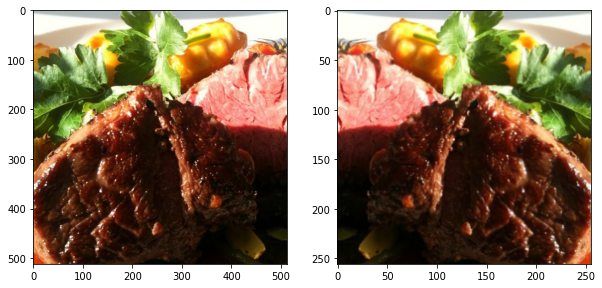

In [84]:
from PIL import Image
image = Image.open("/content/MiniFoodVisioin/test/steak/1285886.jpg")
img = transformer1(image)

plt.figure(figsize = (10 , 7))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1 , 2, 2)
plt.imshow(img.permute((1 , 2 , 0)))

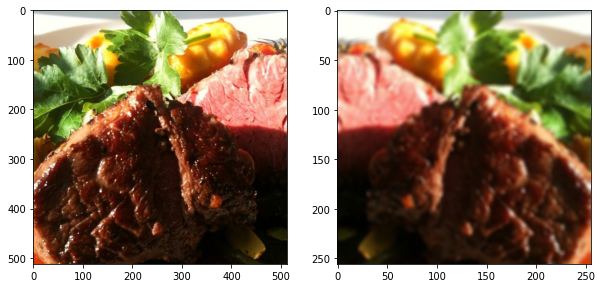

In [83]:
from PIL import Image
image = Image.open("/content/MiniFoodVisioin/test/steak/1285886.jpg")
img = transformer2(image)

plt.figure(figsize = (10 , 7))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1 , 2, 2)
plt.imshow(img)